In [1]:
import pandas as pd
import numpy as np
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
os.path.abspath(".")

'/Users/gracequarterman/rasilab_spelman_2023/code'

In [5]:
data = pd.read_csv('../data/cb_go_output.csv')

In [6]:
data

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes
...,...,...,...,...,...,...
122,GO:0048701,embryonic cranial skeleton morphogenesis,5.930000e-04,3.550000e-02,"14.53 (2150,3,148,3)",[+] Show genes
123,GO:0098662,inorganic cation transmembrane transport,6.650000e-04,3.940000e-02,"7.04 (2150,13,141,6)",[+] Show genes
124,GO:0031100,animal organ regeneration,7.080000e-04,4.170000e-02,"107.50 (2150,8,5,2)",[+] Show genes
125,GO:0000463,maturation of LSU-rRNA from tricistronic rRNA ...,8.370000e-04,4.880000e-02,"6.41 (2150,11,183,6)",[+] Show genes


In [8]:
df = pd.read_csv('../data/cb_go_output.csv')

delimiter = ',''()'

split_numbers = df['Enrichment (N, B, n, b)'].str.split(delimiter, expand=True)

df['Enrichment'] = split_numbers[0]
df['N'] = split_numbers[1]
df['B'] = split_numbers[2]
df['n'] = split_numbers[3]
df['b'] = split_numbers[4]


df.head()


,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,Enrichment,N,B,n,b
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.48 (2150,,115,,263
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.02 (2150,,88,,263
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,4.63 (2150,,90,,294
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.12 (2150,,133,,263
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,4.65 (2150,,88,,294


In [9]:
df['enrichment'] = df['Enrichment'].str.extract(r'(\d+\.\d+)').astype(float)

In [10]:
df.enrichment.dtype

dtype('float64')

In [11]:
filtered_df = df[df['FDR q-value'] < 0.05]
filtered_df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,Enrichment,N,B,n,b,enrichment
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.48 (2150,,115,,263,4.48
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.02 (2150,,88,,263,5.02
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,4.63 (2150,,90,,294,4.63
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.12 (2150,,133,,263,4.12
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,4.65 (2150,,88,,294,4.65


In [12]:
filtered_df_2 = filtered_df[filtered_df['enrichment'] > 2]
filtered_df_2.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,Enrichment,N,B,n,b,enrichment
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.48 (2150,,115,,263,4.48
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.02 (2150,,88,,263,5.02
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,4.63 (2150,,90,,294,4.63
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.12 (2150,,133,,263,4.12
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,4.65 (2150,,88,,294,4.65


In [13]:
len(df)

127

In [14]:
len(filtered_df)

127

In [15]:
len(filtered_df_2)

95

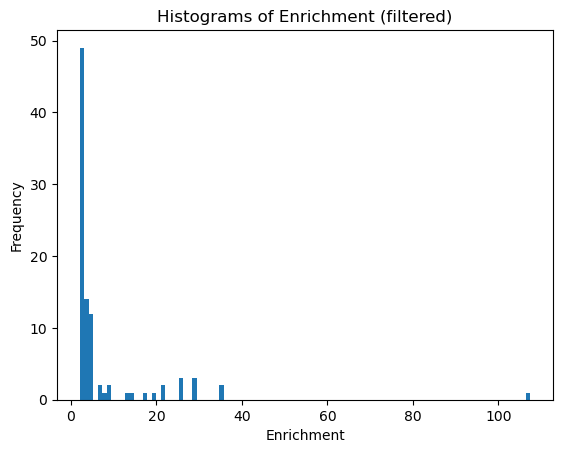

In [16]:
import matplotlib.pyplot as plt

plt.hist(filtered_df_2['enrichment'], bins=100)

plt.title('Histograms of Enrichment (filtered)')
plt.xlabel('Enrichment')
plt.ylabel('Frequency')

plt.savefig('histogram_filtered1_enrichment.png')  # Save the plot as a PNG file

plt.show()

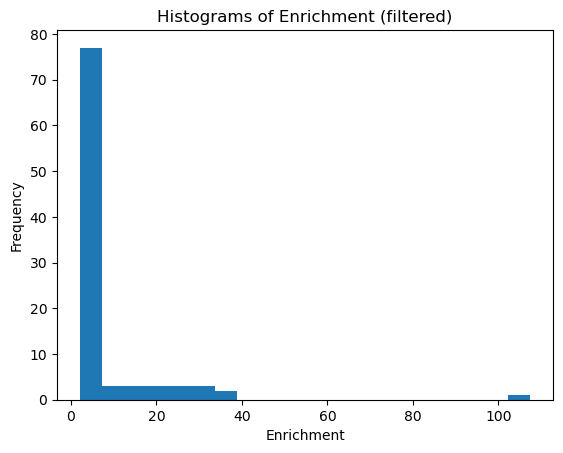

In [17]:
import matplotlib.pyplot as plt

plt.hist(filtered_df_2['enrichment'], bins=20)

plt.title('Histograms of Enrichment (filtered)')
plt.xlabel('Enrichment')
plt.ylabel('Frequency')

plt.savefig('histogram_filtered2_enrichment.png')  # Save the plot as a PNG file

plt.show()

In [18]:
df = pd.DataFrame(filtered_df_2)

filtered_df_2_sorted_ascending = filtered_df_2.sort_values(by= 'FDR q-value', ascending=True)

filtered_df_2.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,Enrichment,N,B,n,b,enrichment
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,4.48 (2150,,115,,263,4.48
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,5.02 (2150,,88,,263,5.02
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,4.63 (2150,,90,,294,4.63
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,4.12 (2150,,133,,263,4.12
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,4.65 (2150,,88,,294,4.65


In [19]:
filtered_df_2_sorted_ascending.rename(columns={'B': 'AssociatedGenes'}, inplace=True)
print(filtered_df_2_sorted_ascending.head())


      GO term                                        Description   
0  GO:0000184  nuclear-transcribed mRNA catabolic process, no...  \
3  GO:0006413                           translational initiation   
7  GO:0045047                            protein targeting to ER   
2  GO:0006613      cotranslational protein targeting to membrane   
6  GO:0072599  establishment of protein localization to endop...   

        P-value   FDR q-value Enrichment (N, B, n, b)           Genes   
0  2.850000e-28  2.090000e-24  4.48 (2150,115,263,63)  [+] Show genes  \
3  2.990000e-27  5.500000e-24  4.12 (2150,133,263,67)  [+] Show genes   
7  6.370000e-27  5.850000e-24   4.58 (2150,91,294,57)  [+] Show genes   
2  2.650000e-27  6.500000e-24   4.63 (2150,90,294,57)  [+] Show genes   
6  6.370000e-27  6.690000e-24   4.58 (2150,91,294,57)  [+] Show genes   

   Enrichment N AssociatedGenes n    b  enrichment  
0  4.48 (2150               115    263        4.48  
3  4.12 (2150               133    263        

In [20]:
columns_to_drop = ['Genes', 'Enrichment', 'b','P-value', 'Enrichment (N, B, n, b)']

columns_to_drop = [col for col in columns_to_drop if col in filtered_df_2_sorted_ascending.columns]

filtered_df_2_sorted_ascending.drop(columns=columns_to_drop, inplace=True)

print(filtered_df_2_sorted_ascending.head())


      GO term                                        Description   
0  GO:0000184  nuclear-transcribed mRNA catabolic process, no...  \
3  GO:0006413                           translational initiation   
7  GO:0045047                            protein targeting to ER   
2  GO:0006613      cotranslational protein targeting to membrane   
6  GO:0072599  establishment of protein localization to endop...   

    FDR q-value N AssociatedGenes n  enrichment  
0  2.090000e-24               115          4.48  
3  5.500000e-24               133          4.12  
7  5.850000e-24                91          4.58  
2  6.500000e-24                90          4.63  
6  6.690000e-24                91          4.58  


In [62]:
filtered_df_2_sorted_ascending.to_csv('cb_splicing_go_table.csv', index=False)